#  Data mining - 2 Assignment

In [1]:
import scipy.cluster.hierarchy as model
from scipy.spatial import distance 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import re

### 1. Read file

In [85]:
file = open('words (1).txt', 'r')
content = file.read().lower()
text = content.splitlines()
file.close()
text

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

### 1.3 Tokenization

In [65]:
def token(words: str):
    a = re.split('[^a-z]', str(words)) 
    while("" in a) : # remove empty elements
        a.remove("")
    return a

### 1.4 Make a list of all the words that appear in the sentences

In [88]:
content = re.sub('[-,/.!?()><"0-9]', '', content)

In [89]:
words_list = []
for word in content.replace('\n', ' ').replace("'", ' ').split(' '):
    if (word not in words_list):
        words_list.append(word)
print(len(words_list))
words_list

254


['in',
 'comparison',
 'to',
 'dogs',
 'cats',
 'have',
 'not',
 'undergone',
 'major',
 'changes',
 'during',
 'the',
 'domestication',
 'process',
 'as',
 'cat',
 'simply',
 'catenates',
 'streams',
 'of',
 'bytes',
 'it',
 'can',
 'be',
 'also',
 'used',
 'concatenate',
 'binary',
 'files',
 'where',
 'will',
 'just',
 'sequence',
 'a',
 'common',
 'interactive',
 'use',
 'for',
 'single',
 'file',
 'is',
 'output',
 'content',
 'standard',
 'hear',
 'sounds',
 'too',
 'faint',
 'or',
 'high',
 'frequency',
 'human',
 'ears',
 'such',
 'those',
 'made',
 'by',
 'mice',
 'and',
 'other',
 'small',
 'animals',
 'one',
 'people',
 'deliberately',
 'tamed',
 'artificial',
 'selection',
 'they',
 'were',
 'useful',
 'predators',
 'vermin',
 'domesticated',
 'its',
 'closest',
 'wild',
 'ancestor',
 'are',
 'both',
 'diploid',
 'organisms',
 'that',
 'possess',
 '',
 'chromosomes',
 'roughly',
 'genes',
 'domestic',
 'similar',
 'size',
 'members',
 'genus',
 'felis',
 'typically',
 'weig

In [68]:
#another method
c = content.replace('\n', ' ').split(' ')
words_list1 = set(w for w in c)

### 1.5 Create Matrix with N x D dimensions

In [69]:
m = np.zeros((22, 254))
x_idx = 0
for sentence in text:
    y_idx = 0
    for word in words_list:
        for x in token(sentence):
            if(x == word):
                m[x_idx][y_idx] += 1
        y_idx += 1
    x_idx += 1
print(m)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 1.]]


### 1.6 Find the cosine distance from first sentence to the all other sentences. Which two sentences is close to the first sentence.

In [70]:
def find_max(x: list):
    max = 0
    for i in range(len(x)):
        if(max < x[i]):
            max = x[i]
            idx = i
    return idx

In [71]:
b = []
for i in range(1, 22):
    b.append(1 - distance.cosine(m[0], m[i]))

In [ ]:
1 - 

In [72]:
c = b.copy()
s1 = find_max(c)
del c[s1]
s2 = find_max(c)

In [73]:
text[s1 + 1]

'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).'

In [74]:
text[s2 + 1]

'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.'

In [75]:
df = pd.DataFrame(m, index = range(22), columns = range(254))
df.set_axis(words_list, axis = 1, inplace = True)
df['Sentence'] = text
df = df.set_index('Sentence')
df

,in,comparison,to,dogs,cats,have,not,undergone,major,changes,...,disk,run,off,external,drive,fifth,update,features,more,count
Sentence,,,,,,,,,,,,,,,,,,,,,
"in comparison to dogs, cats have not undergone major changes during the domestication process.",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a common interactive use of cat for a single file is to output the content of a file to standard output.,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.",1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.",2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).",1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"however, if the output is piped or redirected, cat is unnecessary.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"cat with one named file is safer where human error is a concern - one wrong use of the default redirection symbol "">"" instead of ""<"" (often adjacent on keyboards) may permanently delete the file you were just needing to read.",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Task 2

In [76]:
m1 = np.zeros((22, 254))
x_idx = 0
for sentence in text:
    y_idx = 0
    for word in words_list:
        size = len(token(sentence))
        for x in token(sentence):
            if(x == word):
                m1[x_idx][y_idx] += 1 / size
        y_idx += 1
    x_idx += 1
print(m1)

[[0.07142857 0.07142857 0.07142857 ... 0.         0.         0.        ]
 [0.         0.         0.04166667 ... 0.         0.         0.        ]
 [0.         0.         0.0952381  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.03846154 0.         0.03846154 ... 0.         0.         0.        ]
 [0.         0.         0.04761905 ... 0.04761905 0.04761905 0.04761905]]


In [77]:
def zeros(m):
    num = 0
    for i in m:
        if(i == 0):
            num += 1
    return num

In [78]:
idf = []
for i in m1:
    idf.append(math.log(m1.shape[1] / zeros(i)))

In [79]:
for i in idf:
    for j in range(22):
        for k in range(254):
            m[j][k] = m[j][k] * i

In [80]:
b1 = []
for i in range(1, 22):
    b1.append(1 - distance.cosine(m1[0], m1[i]))

In [81]:
c1 = b1.copy()
s3 = find_max(c1)
del c1[s3]
s4 = find_max(c1)

In [82]:
text[s3 + 1]

'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).'

In [83]:
text[s4 + 1]

'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.'

How we can see, the result same as in 1 task

## Task 3 

In [84]:
dist = pd.DataFrame(c)
dist[1] =  pd.DataFrame(b)
dist = dist.rename(columns = {0: 'x', 1: 'y'} )

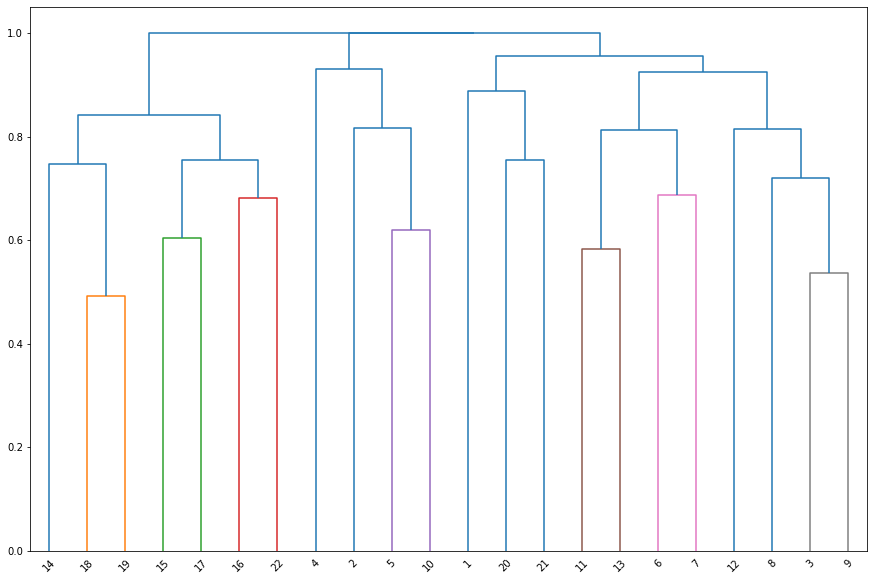

In [27]:
plt.figure(figsize = (15, 10))
first_dend = model.dendrogram(model.linkage(df, method='complete', metric='cosine'), labels = range(1, 23))